# Western Governors University
## D212 - Data Mining II - Principal Component Analysis
### Shane Boyce

### Scenario 1

One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.

 You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to use principal component analysis (PCA) to analyze customer data to identify the principal variables of your customers, ultimately allowing better business and strategic decision-making.

## Part I: Research Question

### A.  Describe the purpose of this data mining report by doing the following:

1. Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).

Which features make up 80% of the variance in the continuous data?

2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

One goal of this analysis is to reduce the dataset to a smaller number of features to speed up future analysis and prevent overfitting.

## Part II: Method Justification

### B.  Explain the reasons for using PCA by doing the following:

1. Explain how PCA analyzes the selected data set. Include expected outcomes.

PCA is a dimensionality reduction technique that reduces the number of features in a dataset by combining features that are highly correlated. The expected outcome is a smaller number of features that explain the majority of the variance in the dataset. PCA calculates eigenvectors and eigenvalues for the covariance matrix of the dataset. The eigenvectors with the highest eigenvalues are the principal components of the dataset.

3. Summarize one assumption of PCA.

PCA assumes that total variance is the same as common variance, or Unique Variance = 0. PCA also requires features are continuous or ordinal. PCA will not work with categorical features.

## Part III: Data Preparation

### C.  Perform data preparation for the chosen dataset by doing the following:

1. Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.

In [ ]:
continuous_vars = ['Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','MonthlyCharge','Bandwidth_GB_Year','Tenure']


2. Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import seaborn as sns

df = pd.read_csv('churn_clean.csv')

# subset
df_cont = df[continuous_vars]
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

In [ ]:
# scaling data
scaler = RobustScaler()

# copy as to not modify data on accident
df_scaled = df_cont.copy()

df_scaled = scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(df_scaled, columns=df_cont.columns)

df_scaled.head()

Age    Income  Outage_sec_perweek  Email  Contacts  \
0  0.416667 -0.135462           -0.516350  -0.50      -0.5   
1 -0.722222 -0.337018            0.425311   0.00      -0.5   
2 -0.083333 -0.692535            0.185824  -0.75      -0.5   
3 -0.138889 -0.418717            1.238837   0.75       0.5   
4  0.833333  0.202919           -0.473555   1.00       0.5   

   Yearly_equip_failure  MonthlyCharge  Bandwidth_GB_Year    Tenure  
0                   1.0       0.081817          -0.546019 -0.534613  
1                   1.0       1.236890          -0.569826 -0.639889  
2                   1.0      -0.124057          -0.281591 -0.367356  
3                   0.0      -0.782281          -0.256331 -0.342468  
4                   1.0      -0.288639          -0.691557 -0.630288

In [ ]:
df_scaled.to_csv('cont_var_scaled.csv')

## Part IV: Analysis

### D.  Perform PCA by doing the following:

1.  Determine the matrix of all the principal components.

In [ ]:
pca = PCA()
fit = pca.fit(df_scaled)
X_pca = fit.fit_transform(df_scaled)

X_pca

array([[-0.2783248 ,  0.63448221, -0.39230504, ..., -0.35449527,
        -0.49498008, -0.02365699],
       [-0.56519472, -0.18990025,  0.50238089, ...,  0.80149758,
        -0.45975262, -0.02473025],
       [-0.8499342 ,  0.71146585,  0.32185051, ...,  0.13129298,
        -0.48104423,  0.03969882],
       ...,
       [ 0.25307545,  0.75180581, -0.62789238, ...,  0.15616245,
        -0.47893437, -0.04917139],
       [-0.74144158, -0.59337068,  0.59799407, ...,  0.4043159 ,
        -0.00146656, -0.03976461],
       [-0.99412862, -1.24437626,  0.16677492, ...,  0.69999285,
         0.01651091, -0.0225904 ]])

In [ ]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df

0         1         2         3         4         5         6  \
0    -0.278325  0.634482 -0.392305 -0.429865  0.615908  0.657823 -0.354495   
1    -0.565195 -0.189900  0.502381  0.238736  1.303699  0.673667  0.801498   
2    -0.849934  0.711466  0.321851 -0.535755  0.218386  0.594247  0.131293   
3    -0.714933 -1.074904  0.714419 -1.078714 -0.329799 -0.391988  0.064369   
4    -0.021450 -0.813615 -0.889265 -0.705156  0.401827  0.722600 -0.827096   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.486140  0.078333 -0.059134  0.450351 -0.828777 -0.510457  0.784621   
9996 -0.165460 -0.414496 -0.853958  1.078875 -0.174069 -0.387808  0.129230   
9997  0.253075  0.751806 -0.627892  0.253087 -0.134755 -0.431975  0.156162   
9998 -0.741442 -0.593371  0.597994  1.552336  0.029362 -0.399281  0.404316   
9999 -0.994129 -1.244376  0.166775  1.049851 -0.242197 -0.389436  0.699993   

             7         8  
0    -0.494980 -0.023657  
1    -0.459753 -0.024730  
2    -0.481044  0.039699  
3     0.485974  0.059458  
4     0.478779 -0.037976  
...        ...       ...  
9995  0.537685  0.044473  
9996  0.511567 -0.002579  
9997 -0.478934 -0.049171  
9998 -0.001467 -0.039765  
9999  0.016511 -0.022590  

[10000 rows x 9 columns]

In [ ]:
X_pca_df.to_csv('full_pca.csv')

2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.

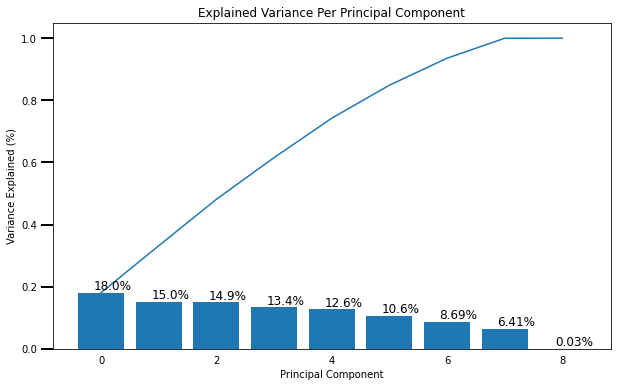

In [ ]:
#Developed as part of WGUs DMDA Udacity Nano Degree Program
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
scree_plot(pca)

3.  Identify the variance of each of the principal components identified in part D2.

In [ ]:
components = pd.Series(range(9))
components

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
dtype: int64

pca.explained_variance_ratio_

In [ ]:

pca_explained_df = components.to_frame(name='Component')

pca_explained_df

Component
0          0
1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8

In [ ]:
pca_explained_df['explained_var'] = pca.explained_variance_ratio_
pca_explained_df

Component  explained_var
0          0       0.180917
1          1       0.150902
2          2       0.149543
3          3       0.134157
4          4       0.126762
5          5       0.106202
6          6       0.086969
7          7       0.064160
8          8       0.000387

In [ ]:
# developed during WGU DMDA Nano Degree program
def weight(x,n,df):
    pca_weights = pd.DataFrame(x.components_, columns=(df.columns))
    return pca_weights

4.  Identify the total variance captured by the principal components identified in part D2.

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18091708, 0.33181872, 0.48136172, 0.61551845, 0.74228095,
       0.84848314, 0.93545262, 0.9996127 , 1.        ])

In [ ]:
pca_explained_df['cumulative_var'] = np.cumsum(pca.explained_variance_ratio_)
pca_explained_df

Component  explained_var  cumulative_var
0          0       0.180917        0.180917
1          1       0.150902        0.331819
2          2       0.149543        0.481362
3          3       0.134157        0.615518
4          4       0.126762        0.742281
5          5       0.106202        0.848483
6          6       0.086969        0.935453
7          7       0.064160        0.999613
8          8       0.000387        1.000000

The above says we can reduce the dataset to 6 from 9 components to explain 84% of variance in the data.

In [ ]:
weight(pca, 0, df_scaled)

Age    Income  Outage_sec_perweek     Email  Contacts  \
0 -0.005067  0.996976           -0.053374 -0.052780  0.000208   
1  0.002240 -0.068835           -0.324268 -0.938145 -0.009059   
2 -0.011281  0.033313            0.927370 -0.322708  0.015736   
3  0.022376 -0.001936           -0.166739  0.071418  0.003877   
4  0.014998  0.008879           -0.059465 -0.077312 -0.000369   
5  0.045266 -0.008415           -0.010106  0.043034 -0.010725   
6 -0.997071 -0.005816           -0.015145  0.004360 -0.050890   
7 -0.050205 -0.001734           -0.017801 -0.003036  0.998474   
8  0.019918 -0.000688            0.000153  0.000090 -0.000506   

   Yearly_equip_failure  MonthlyCharge  Bandwidth_GB_Year    Tenure  
0              0.011532      -0.012280           0.007216  0.006529  
1              0.043292      -0.046981           0.053369  0.054582  
2              0.023423       0.159799           0.068419  0.059953  
3              0.002698       0.753957           0.466004  0.425394  
4             -0.072686       0.632625          -0.530728 -0.550466  
5              0.995046       0.041505          -0.044487 -0.044647  
6              0.043263       0.026025           0.013869 -0.015378  
7              0.012877      -0.003879          -0.002017 -0.003930  
8             -0.000196      -0.032033           0.701007 -0.712155

In [ ]:
pca_explained_df[df_cont.columns] = weight(pca, 0, df_scaled)
pca_explained_df

Component  explained_var  cumulative_var       Age    Income  \
0          0       0.180917        0.180917 -0.005067  0.996976   
1          1       0.150902        0.331819  0.002240 -0.068835   
2          2       0.149543        0.481362 -0.011281  0.033313   
3          3       0.134157        0.615518  0.022376 -0.001936   
4          4       0.126762        0.742281  0.014998  0.008879   
5          5       0.106202        0.848483  0.045266 -0.008415   
6          6       0.086969        0.935453 -0.997071 -0.005816   
7          7       0.064160        0.999613 -0.050205 -0.001734   
8          8       0.000387        1.000000  0.019918 -0.000688   

   Outage_sec_perweek     Email  Contacts  Yearly_equip_failure  \
0           -0.053374 -0.052780  0.000208              0.011532   
1           -0.324268 -0.938145 -0.009059              0.043292   
2            0.927370 -0.322708  0.015736              0.023423   
3           -0.166739  0.071418  0.003877              0.002698   
4           -0.059465 -0.077312 -0.000369             -0.072686   
5           -0.010106  0.043034 -0.010725              0.995046   
6           -0.015145  0.004360 -0.050890              0.043263   
7           -0.017801 -0.003036  0.998474              0.012877   
8            0.000153  0.000090 -0.000506             -0.000196   

   MonthlyCharge  Bandwidth_GB_Year    Tenure  
0      -0.012280           0.007216  0.006529  
1      -0.046981           0.053369  0.054582  
2       0.159799           0.068419  0.059953  
3       0.753957           0.466004  0.425394  
4       0.632625          -0.530728 -0.550466  
5       0.041505          -0.044487 -0.044647  
6       0.026025           0.013869 -0.015378  
7      -0.003879          -0.002017 -0.003930  
8      -0.032033           0.701007 -0.712155

In [ ]:
pca_explained_df.to_csv('pca_comp_variance_and_weights.csv')

In [ ]:
#reinstantiate PCA to the 6 components
pca = PCA(n_components = 0.8)
pca = pca.fit(df_scaled) 
X_pca = pca.fit_transform(df_scaled)

X_pca.shape

(10000, 6)

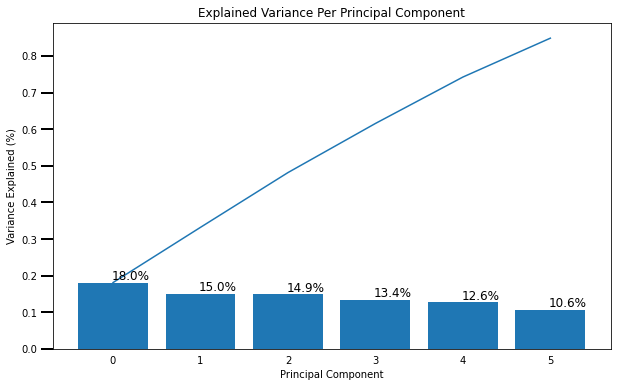

In [ ]:
scree_plot(pca)

In [ ]:
components = pd.Series(range(6))
reduced_pca_df = components.to_frame(name='Component')
reduced_pca_df['explained_var'] = pca.explained_variance_ratio_
reduced_pca_df['cumulative_var'] = np.cumsum(pca.explained_variance_ratio_)
reduced_pca_df[df_cont.columns] = weight(pca, 0, df_scaled)

In [ ]:
reduced_pca_df

Component  explained_var  cumulative_var       Age    Income  \
0          0       0.180917        0.180917 -0.005067  0.996976   
1          1       0.150902        0.331819  0.002240 -0.068835   
2          2       0.149543        0.481362 -0.011281  0.033313   
3          3       0.134157        0.615518  0.022376 -0.001936   
4          4       0.126762        0.742281  0.014998  0.008879   
5          5       0.106202        0.848483  0.045266 -0.008415   

   Outage_sec_perweek     Email  Contacts  Yearly_equip_failure  \
0           -0.053374 -0.052780  0.000208              0.011532   
1           -0.324268 -0.938145 -0.009059              0.043292   
2            0.927370 -0.322708  0.015736              0.023423   
3           -0.166739  0.071418  0.003877              0.002698   
4           -0.059465 -0.077312 -0.000369             -0.072686   
5           -0.010106  0.043034 -0.010725              0.995046   

   MonthlyCharge  Bandwidth_GB_Year    Tenure  
0      -0.012280           0.007216  0.006529  
1      -0.046981           0.053369  0.054582  
2       0.159799           0.068419  0.059953  
3       0.753957           0.466004  0.425394  
4       0.632625          -0.530728 -0.550466  
5       0.041505          -0.044487 -0.044647

In [ ]:
reduced_pca_df.to_csv('reduced_pca.csv')

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

labels

{'0': 'PC 1 (18.1%)',
 '1': 'PC 2 (15.1%)',
 '2': 'PC 3 (15.0%)',
 '3': 'PC 4 (13.4%)',
 '4': 'PC 5 (12.7%)',
 '5': 'PC 6 (10.6%)'}

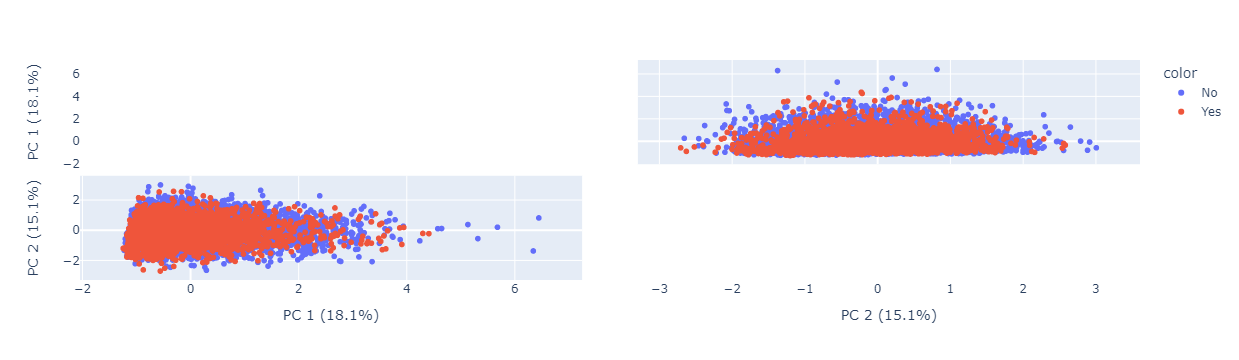

In [ ]:
fig = px.scatter_matrix(
    X_pca,
    labels=labels,
    dimensions=range(2),
    color = df['Churn']
)
fig.update_traces(diagonal_visible=False)
fig.show()

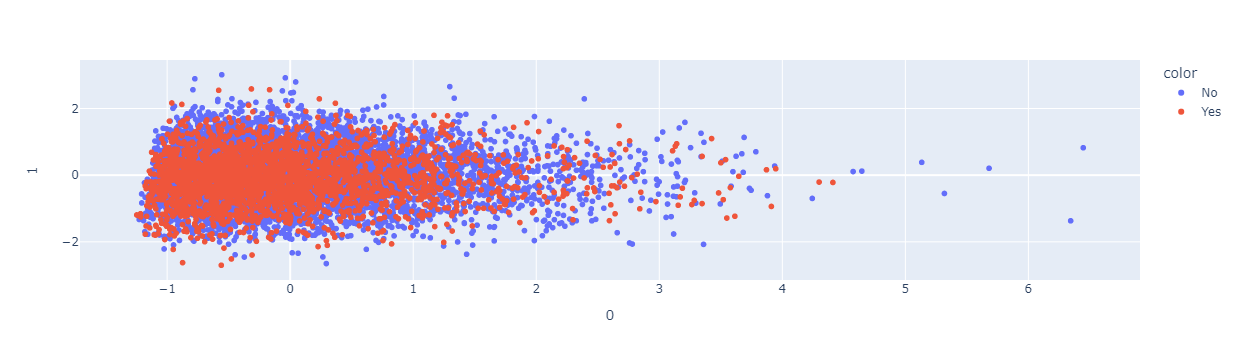

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
fig = px.scatter(X_pca, x=0, y=1, color=df['Churn'])
fig.show()

5.  Summarize the results of your data analysis.

The analysis shows that we can gather 80% of the variance in this dataset with 6 principal components. The top 4 principal components account for more than half of the variance as well. I have created a csv for the full and reduced components with component lable, variance and cumulative variance to assist with further analysis. PCA reduction only resulted in removing 1/3rd of the components in a rather small component set. Showing the first [0] component and the second [1] on a graph show clear overlapping of data. Along with even distribution of components, overlapping is a clear indicator the PCA is not a good choice for this dataset and manual dimensionality reduction through ridge, lasso or MLR as previously used on this set would be better suited.

## Sources

No external sources used

In [ ]:
pca = PCA()
fit = pca.fit(df_scaled)
X_pca = fit.fit_transform(df_scaled)

X_pca

array([[-0.2783248 ,  0.63448221, -0.39230504, ..., -0.35449527,
        -0.49498008, -0.02365699],
       [-0.56519472, -0.18990025,  0.50238089, ...,  0.80149758,
        -0.45975262, -0.02473025],
       [-0.8499342 ,  0.71146585,  0.32185051, ...,  0.13129298,
        -0.48104423,  0.03969882],
       ...,
       [ 0.25307545,  0.75180581, -0.62789238, ...,  0.15616245,
        -0.47893437, -0.04917139],
       [-0.74144158, -0.59337068,  0.59799407, ...,  0.4043159 ,
        -0.00146656, -0.03976461],
       [-0.99412862, -1.24437626,  0.16677492, ...,  0.69999285,
         0.01651091, -0.0225904 ]])

In [ ]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df

0         1         2         3         4         5         6  \
0    -0.278325  0.634482 -0.392305 -0.429865  0.615908  0.657823 -0.354495   
1    -0.565195 -0.189900  0.502381  0.238736  1.303699  0.673667  0.801498   
2    -0.849934  0.711466  0.321851 -0.535755  0.218386  0.594247  0.131293   
3    -0.714933 -1.074904  0.714419 -1.078714 -0.329799 -0.391988  0.064369   
4    -0.021450 -0.813615 -0.889265 -0.705156  0.401827  0.722600 -0.827096   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.486140  0.078333 -0.059134  0.450351 -0.828777 -0.510457  0.784621   
9996 -0.165460 -0.414496 -0.853958  1.078875 -0.174069 -0.387808  0.129230   
9997  0.253075  0.751806 -0.627892  0.253087 -0.134755 -0.431975  0.156162   
9998 -0.741442 -0.593371  0.597994  1.552336  0.029362 -0.399281  0.404316   
9999 -0.994129 -1.244376  0.166775  1.049851 -0.242197 -0.389436  0.699993   

             7         8  
0    -0.494980 -0.023657  
1    -0.459753 -0.024730  
2    -0.481044  0.039699  
3     0.485974  0.059458  
4     0.478779 -0.037976  
...        ...       ...  
9995  0.537685  0.044473  
9996  0.511567 -0.002579  
9997 -0.478934 -0.049171  
9998 -0.001467 -0.039765  
9999  0.016511 -0.022590  

[10000 rows x 9 columns]

In [ ]:
X_pca_df.to_csv('full_pca.csv')

2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.

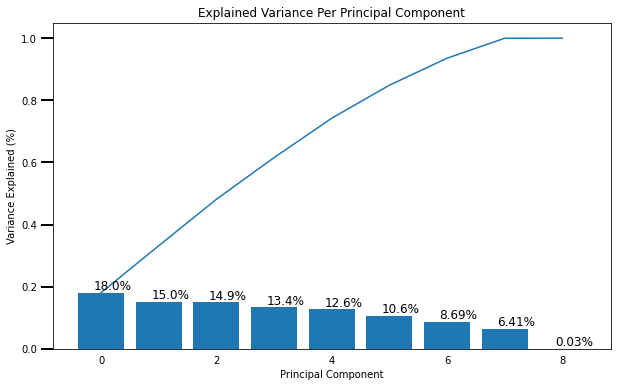

In [ ]:
#Developed as part of WGUs DMDA Udacity Nano Degree Program
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
scree_plot(pca)

3.  Identify the variance of each of the principal components identified in part D2.

In [ ]:
components = pd.Series(range(9))
components

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
dtype: int64

In [ ]:
pca.explained_variance_ratio_

array([0.18091708, 0.15090164, 0.149543  , 0.13415673, 0.12676249,
       0.1062022 , 0.08696948, 0.06416008, 0.0003873 ])

In [ ]:

pca_explained_df = components.to_frame(name='Component')

pca_explained_df

Component
0          0
1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8

In [ ]:
pca_explained_df['explained_var'] = pca.explained_variance_ratio_
pca_explained_df

Component  explained_var
0          0       0.180917
1          1       0.150902
2          2       0.149543
3          3       0.134157
4          4       0.126762
5          5       0.106202
6          6       0.086969
7          7       0.064160
8          8       0.000387

In [ ]:
# developed during WGU DMDA Nano Degree program
def weight(x,n,df):
    pca_weights = pd.DataFrame(x.components_, columns=(df.columns))
    return pca_weights

4.  Identify the total variance captured by the principal components identified in part D2.

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18091708, 0.33181872, 0.48136172, 0.61551845, 0.74228095,
       0.84848314, 0.93545262, 0.9996127 , 1.        ])

In [ ]:
pca_explained_df['cumulative_var'] = np.cumsum(pca.explained_variance_ratio_)
pca_explained_df

Component  explained_var  cumulative_var
0          0       0.180917        0.180917
1          1       0.150902        0.331819
2          2       0.149543        0.481362
3          3       0.134157        0.615518
4          4       0.126762        0.742281
5          5       0.106202        0.848483
6          6       0.086969        0.935453
7          7       0.064160        0.999613
8          8       0.000387        1.000000

The above says we can reduce the dataset to 6 from 9 components to explain 84% of variance in the data.

In [ ]:
weight(pca, 0, df_scaled)

Age    Income  Outage_sec_perweek     Email  Contacts  \
0 -0.005067  0.996976           -0.053374 -0.052780  0.000208   
1  0.002240 -0.068835           -0.324268 -0.938145 -0.009059   
2 -0.011281  0.033313            0.927370 -0.322708  0.015736   
3  0.022376 -0.001936           -0.166739  0.071418  0.003877   
4  0.014998  0.008879           -0.059465 -0.077312 -0.000369   
5  0.045266 -0.008415           -0.010106  0.043034 -0.010725   
6 -0.997071 -0.005816           -0.015145  0.004360 -0.050890   
7 -0.050205 -0.001734           -0.017801 -0.003036  0.998474   
8  0.019918 -0.000688            0.000153  0.000090 -0.000506   

   Yearly_equip_failure  MonthlyCharge  Bandwidth_GB_Year    Tenure  
0              0.011532      -0.012280           0.007216  0.006529  
1              0.043292      -0.046981           0.053369  0.054582  
2              0.023423       0.159799           0.068419  0.059953  
3              0.002698       0.753957           0.466004  0.425394  
4             -0.072686       0.632625          -0.530728 -0.550466  
5              0.995046       0.041505          -0.044487 -0.044647  
6              0.043263       0.026025           0.013869 -0.015378  
7              0.012877      -0.003879          -0.002017 -0.003930  
8             -0.000196      -0.032033           0.701007 -0.712155

In [ ]:
pca_explained_df[df_cont.columns] = weight(pca, 0, df_scaled)
pca_explained_df

Component  explained_var  cumulative_var       Age    Income  \
0          0       0.180917        0.180917 -0.005067  0.996976   
1          1       0.150902        0.331819  0.002240 -0.068835   
2          2       0.149543        0.481362 -0.011281  0.033313   
3          3       0.134157        0.615518  0.022376 -0.001936   
4          4       0.126762        0.742281  0.014998  0.008879   
5          5       0.106202        0.848483  0.045266 -0.008415   
6          6       0.086969        0.935453 -0.997071 -0.005816   
7          7       0.064160        0.999613 -0.050205 -0.001734   
8          8       0.000387        1.000000  0.019918 -0.000688   

   Outage_sec_perweek     Email  Contacts  Yearly_equip_failure  \
0           -0.053374 -0.052780  0.000208              0.011532   
1           -0.324268 -0.938145 -0.009059              0.043292   
2            0.927370 -0.322708  0.015736              0.023423   
3           -0.166739  0.071418  0.003877              0.002698   
4           -0.059465 -0.077312 -0.000369             -0.072686   
5           -0.010106  0.043034 -0.010725              0.995046   
6           -0.015145  0.004360 -0.050890              0.043263   
7           -0.017801 -0.003036  0.998474              0.012877   
8            0.000153  0.000090 -0.000506             -0.000196   

   MonthlyCharge  Bandwidth_GB_Year    Tenure  
0      -0.012280           0.007216  0.006529  
1      -0.046981           0.053369  0.054582  
2       0.159799           0.068419  0.059953  
3       0.753957           0.466004  0.425394  
4       0.632625          -0.530728 -0.550466  
5       0.041505          -0.044487 -0.044647  
6       0.026025           0.013869 -0.015378  
7      -0.003879          -0.002017 -0.003930  
8      -0.032033           0.701007 -0.712155

In [ ]:
pca_explained_df.to_csv('pca_comp_variance_and_weights.csv')

In [ ]:
#reinstantiate PCA to the 6 components
pca = PCA(n_components = 0.8)
pca = pca.fit(df_scaled) 
X_pca = pca.fit_transform(df_scaled)

X_pca.shape

(10000, 6)

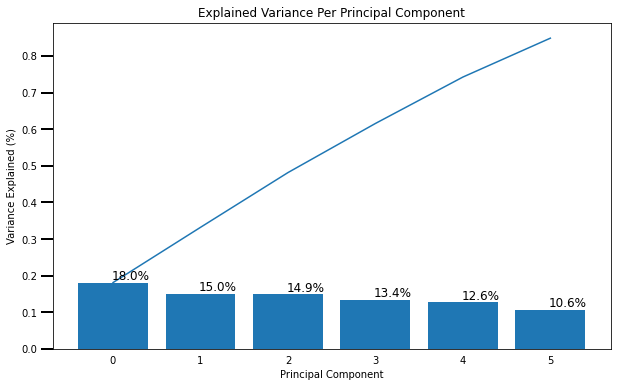

In [ ]:
scree_plot(pca)

In [ ]:
components = pd.Series(range(6))
reduced_pca_df = components.to_frame(name='Component')
reduced_pca_df['explained_var'] = pca.explained_variance_ratio_
reduced_pca_df['cumulative_var'] = np.cumsum(pca.explained_variance_ratio_)
reduced_pca_df[df_cont.columns] = weight(pca, 0, df_scaled)

In [ ]:
reduced_pca_df

Component  explained_var  cumulative_var       Age    Income  \
0          0       0.180917        0.180917 -0.005067  0.996976   
1          1       0.150902        0.331819  0.002240 -0.068835   
2          2       0.149543        0.481362 -0.011281  0.033313   
3          3       0.134157        0.615518  0.022376 -0.001936   
4          4       0.126762        0.742281  0.014998  0.008879   
5          5       0.106202        0.848483  0.045266 -0.008415   

   Outage_sec_perweek     Email  Contacts  Yearly_equip_failure  \
0           -0.053374 -0.052780  0.000208              0.011532   
1           -0.324268 -0.938145 -0.009059              0.043292   
2            0.927370 -0.322708  0.015736              0.023423   
3           -0.166739  0.071418  0.003877              0.002698   
4           -0.059465 -0.077312 -0.000369             -0.072686   
5           -0.010106  0.043034 -0.010725              0.995046   

   MonthlyCharge  Bandwidth_GB_Year    Tenure  
0      -0.012280           0.007216  0.006529  
1      -0.046981           0.053369  0.054582  
2       0.159799           0.068419  0.059953  
3       0.753957           0.466004  0.425394  
4       0.632625          -0.530728 -0.550466  
5       0.041505          -0.044487 -0.044647

In [ ]:
reduced_pca_df.to_csv('reduced_pca.csv')

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

labels

{'0': 'PC 1 (18.1%)',
 '1': 'PC 2 (15.1%)',
 '2': 'PC 3 (15.0%)',
 '3': 'PC 4 (13.4%)',
 '4': 'PC 5 (12.7%)',
 '5': 'PC 6 (10.6%)'}

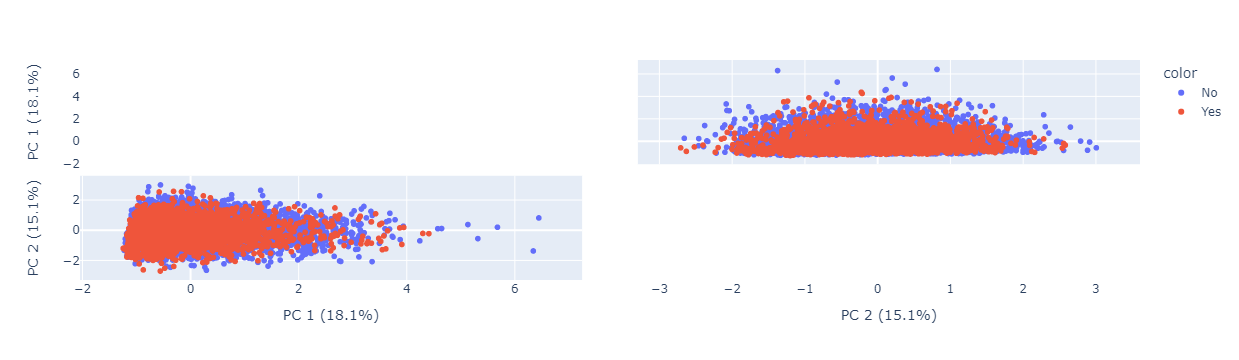

In [ ]:
fig = px.scatter_matrix(
    X_pca,
    labels=labels,
    dimensions=range(2),
    color = df['Churn']
)
fig.update_traces(diagonal_visible=False)
fig.show()

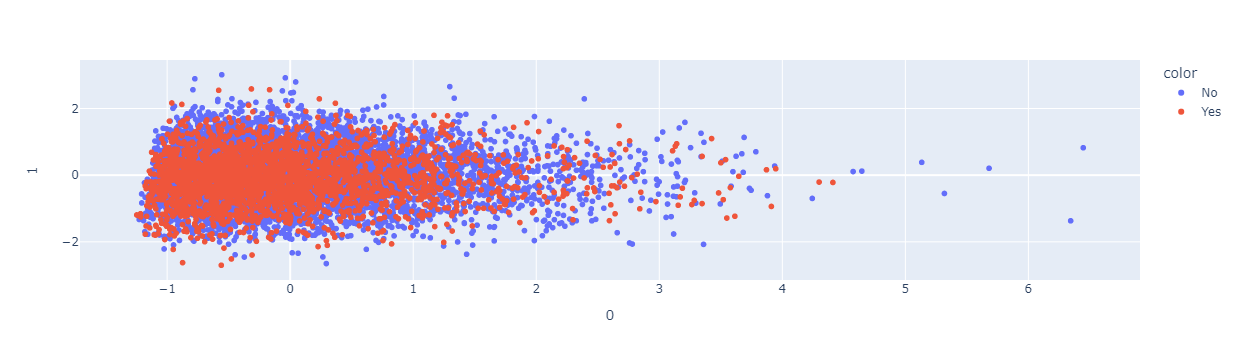

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
fig = px.scatter(X_pca, x=0, y=1, color=df['Churn'])
fig.show()

5.  Summarize the results of your data analysis.

The analysis shows that we can gather 80% of the variance in this dataset with 6 principal components. The top 4 principal components account for more than half of the variance as well. I have created a csv for the full and reduced components with component lable, variance and cumulative variance to assist with further analysis. PCA reduction only resulted in removing 1/3rd of the components in a rather small component set. Showing the first [0] component and the second [1] on a graph show clear overlapping of data. Along with even distribution of components, overlapping is a clear indicator the PCA is not a good choice for this dataset and manual dimensionality reduction through ridge, lasso or MLR as previously used on this set would be better suited.

## Sources

No external sources used